# Proyecto 2

### En la primera parte, vamos a exportar la paquetería que se necesitá para la resolución del problema, para esto, primero se va a revisar que los datos en el archivo estén todos correctos. Vamos a leerlos y, posteriormente, vamos a identificar posibles problemas en estos

In [223]:
# Used to read the data file
import pandas as pd

# Used in the definition of the model and its initial condition
import numpy as np

# Used for plots other than those generated by the parameter estimation module
import matplotlib.pyplot as plt
%matplotlib inline
import PDEparams as pde

In [224]:
df = pd.read_csv('CoV2019.csv')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
Date of report    41 non-null object
Days              41 non-null int64
Total             41 non-null int64
China             41 non-null int64
Death China       41 non-null int64
Other             41 non-null int64
Death Outside     41 non-null int64
Death Globally    41 non-null int64
dtypes: int64(7), object(1)
memory usage: 2.7+ KB


In [226]:
df.head()

,Date of report,Days,Total,China,Death China,Other,Death Outside,Death Globally
0,01/20/20,21,282,278,6,4,0,6
1,01/21/20,22,346,341,6,4,0,6
2,01/23/20,24,581,571,17,7,0,17
3,01/24/20,25,846,830,25,11,0,25
4,01/25/20,26,1320,1297,41,23,0,41


Los archivos en primera instancia se ven bastante bien, por lo cual, ahora se va a utilizar el módelo ISR para este sistema, el cual viene dada por:

$$\begin{align}
\frac{\mathrm{d} S}{\mathrm{d} t} &= -\beta\, S\, I\,\\
\frac{\mathrm{d} I}{\mathrm{d} t} &= +\beta\,S\,I-\gamma\,I\\
\frac{\mathrm{d} R}{\mathrm{d} t} &= \gamma I
\end{align}$$

donde <span style="color:red">$S$</span> es la población susceptible, <span style="color:red">$I$</span> es la población infectada y <span style="color:red">$R$</span> es la población inmune o fallecida.

En los datos, se puede observar que vienen los features 'china' y 'death china', por lo que, se asumirá que el feature de 'China' corresponde a los enfermos por Covid-19 en China y las muertes ocasionadas por esta, i, e., <span style="color:red">$I+R$</span>, el feature de 'Death China' los muertos por Covid en China, además, dado que no se sabe quienes son inmunes o no hay conocimiento de ello aún, se tomará como <span style="color:red">$R$</span> solo a los muertos por Covid en China y dado que la población de china al inicio del año era de 1 415 368 746 y no se encontró la evolución de la población de china durante ese periodo, i. e., no se encontró la información respecto a los nacimientos que hubo en china ni los fallecimientos por otras enfermedades en el periodo 20/01/2020-01/03/2020, se asumirá que la población en china en esa temporalidad, es la inicial menos los muertos reportados por Covid en ese día, por lo cual, la población susceptible <span style="color:red">$S$</span> corresponde a 1 415 368 746 menos el feature 'China'.

In [227]:
df.rename(columns={'China':'I+R','Death China':'R'},inplace=True)
df['S']=1415368746-df['I+R']
df['I']=df['I+R']-df['R']
df

,Date of report,Days,Total,I+R,R,Other,Death Outside,Death Globally,S,I
0,01/20/20,21,282,278,6,4,0,6,1415368468,272
1,01/21/20,22,346,341,6,4,0,6,1415368405,335
2,01/23/20,24,581,571,17,7,0,17,1415368175,554
3,01/24/20,25,846,830,25,11,0,25,1415367916,805
4,01/25/20,26,1320,1297,41,23,0,41,1415367449,1256
5,01/26/20,27,2014,1985,56,29,0,56,1415366761,1929
6,01/27/20,28,2798,2761,80,37,0,80,1415365985,2681
7,01/28/20,29,4593,4537,106,56,0,106,1415364209,4431
8,01/29/20,30,6065,5997,132,68,0,132,1415362749,5865
9,01/30/20,31,7818,7736,170,82,0,170,1415361010,7566


Ahora, se va a definir la función del modelo ISR y las condiciones iniciales para $I$, $S$ y $R$.

In [228]:
def ISR(z,t,b,g):
    S , I , R = z
    return [-b*S*I/1415368746, (b*S*I/1415368746)-g*I, g*I]

In [327]:
def S_initial():
    return 1415368746
def I_initial():
    return 1
def R_initial():
    return 0

In [328]:
df1=pd.DataFrame(data={'0': df['Days'],'1':df['S'], '2':df['I'],'3':df['R']})
df1

,0,1,2,3
0,21,1415368468,272,6
1,22,1415368405,335,6
2,24,1415368175,554,17
3,25,1415367916,805,25
4,26,1415367449,1256,41
5,27,1415366761,1929,56
6,28,1415365985,2681,80
7,29,1415364209,4431,106
8,30,1415362749,5865,132
9,31,1415361010,7566,170


Ahora, se va a ajustar el sistema de ecuaciones diferenciales a los datos

In [334]:
my_model = pde.PDEmodel(df1, ISR, [S_initial, I_initial, R_initial], bounds=[(0, 1000), (0,1000)], 
                        param_names=[r'$b$', r'$g$'], nvars=3, ndims=0, nreplicates=1, obsidx=None, outfunc=None)

In [335]:
my_model.initial_condition

array([1415368746,          1,          0])

Ahora, obtenemos $\beta$ y $\gamma$.

In [336]:
my_model.fit()

          $b$         $g$
0  103.358635  103.303797


In [337]:
my_model.best_params

,$b$,$g$
0,103.358635,103.303797


In [338]:
my_model.best_error

1202086946.843753

Veamos ahora la identificabilidad de los parametros, para esto, calculamos el likelihood de los parámetros

In [339]:
my_model.likelihood_profiles()

In [340]:
my_model.result_profiles

,parameter,value,error
0,$b$,0.00000,1.630296e+09
1,$b$,10.10101,1.630241e+09
2,$b$,20.20202,1.630282e+09
3,$b$,30.30303,1.629485e+09
4,$b$,40.40404,1.630157e+09
...,...,...,...
195,$g$,959.59596,1.288490e+09
196,$g$,969.69697,1.288940e+09
197,$g$,979.79798,1.623037e+09
198,$g$,989.89899,1.628913e+09


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


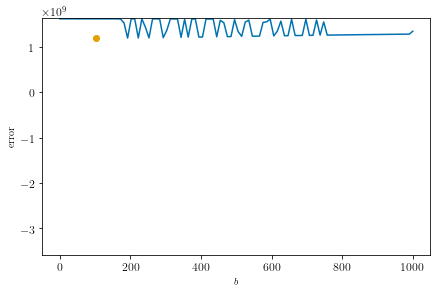

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


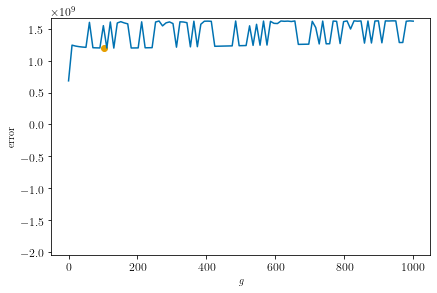

In [341]:
my_model.plot_profiles()

Como observamos, no hay identificabilidad de los parámetros, ya que, hay varios mínimos y máximos que podrían ser posibles valores para $\beta$ y $\gamma$, para obtener una mejor aproximación de los valores para $\beta$ y $\gamma$, se propone hacer un bootstrapping en futuras ocaciones